# IIA 2024 - Aprendizaje Automatizado
### Lucas Poma
## Trabajo Practico 1

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

## Ejercicio 1

In [2]:
def inside_circle(x,y):
  return np.linalg.norm([x,y]) <= 1

def cartesian_to_polar(x, y):
    rho = (x**2 + y**2)**0.5
    theta = math.atan2(y, x)
    return rho, theta

def in_curve(rho, theta, npi):
  rho_curve1 = (theta + (npi-1)*math.pi) / (4 * math.pi)
  rho_curve2 = (theta + npi*math.pi) / (4 * math.pi)
  return rho_curve1 <= rho <= rho_curve2

def in_curves(x, y):
    rho, theta = cartesian_to_polar(x, y)
    for i in [1, 3, 5, 7]:
        if in_curve(rho, theta, i):
            return True
    return False

def espirales(n):
  half = int(n/2)
  bothClass = []
  countClass0 = 0
  countClass1 = 0

  while (countClass0 < half or countClass1 < n-half):
    gen = np.random.uniform(-1,1,size=(half,2))
    for (x,y) in gen:
      if (inside_circle(x,y)):
        if (in_curves(x,y)):
          if (countClass0 < half):
            bothClass.append([x,y,0])
            countClass0 += 1
        else:
          if (countClass1 < n - half):
            bothClass.append([x,y,1])
            countClass1 += 1
  df = pd.DataFrame(bothClass, columns=['dim_0', 'dim_1', 'class'])
  return df

Accuracy 150 Datos: 0.6569
Accuracy 600 Datos: 0.8255
Accuracy 3000 Datos: 0.911


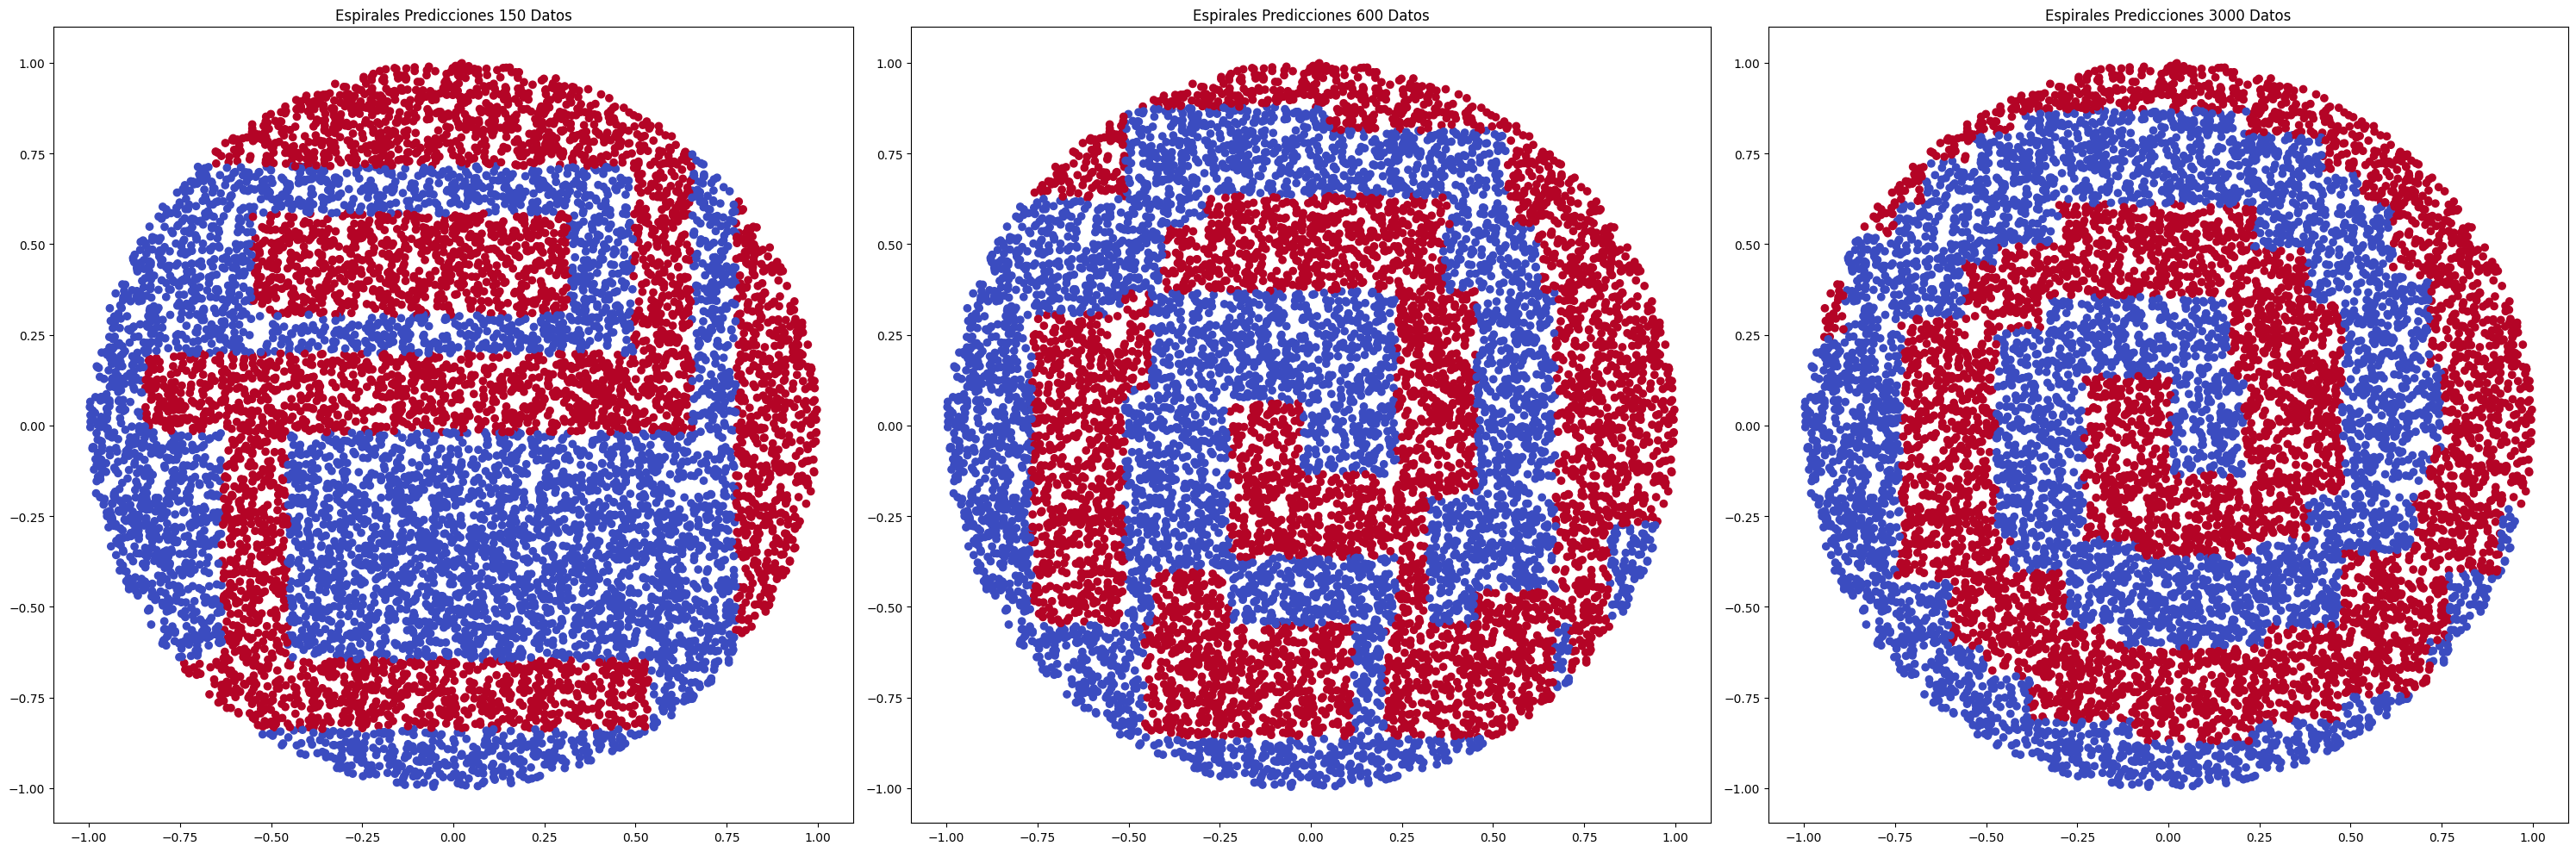

In [3]:
testEspiral10000 = espirales(10000)
X_test = testEspiral10000.drop(columns=['class'])
y_test = testEspiral10000['class']
sizes = [150, 600, 3000]

fig, axs = plt.subplots(1, 3, figsize=(30, 10))

for idx, samples in enumerate(sizes):
    df = espirales(samples)
    X = df.drop(columns=['class'])
    y = df['class']
    clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
    clf = clf.fit(X, y)
    ax = axs[idx]
    ax.scatter(X_test['dim_0'], X_test['dim_1'], c=clf.predict(X_test), cmap='coolwarm')
    ax.set_title(f'Espirales Predicciones {samples} Datos')
    print(f'Accuracy {samples} Datos: {clf.score(X_test, y_test)}')

plt.tight_layout()
plt.show()


Se puede observar que, a medida que entrenamos el árbol de decisión con más muestras, la figura resultante se asemeja más a una espiral. Esto se evidencia en la precisión de las predicciones de cada árbol en el conjunto de prueba.<br>

Mientras menor la cantidad de ejemplos para el entrenamiento, el gráfico de las predicciones tiende a ser más "cuadrado" o "poligonal" en comparación con el gráfico generado utilizando 10000 muestras. Con menos datos, el árbol tiene menos información para dividir el espacio, lo que resulta en particiones más grandes y menos precisas. Esto genera formas más aproximadas y menos detalladas. Estas divisiones son menos representativas de la distribución real de los datos.<br>

## Ejercicio 2

In [4]:
sizes = [125, 250, 500, 1000, 2000, 4000]
dataDiagonales = []
dataParalelas = []

### Diagonales

In [5]:
def diagonales(n, d, C):
  half = int(n/2)

  mClass0 = -np.ones(d)
  mClass1 = np.ones(d)
  covM = np.identity(d) * (C**2 * d)

  class0 = np.random.multivariate_normal(mClass0, covM, half)
  class1 = np.random.multivariate_normal(mClass1, covM, n - half)

  labels0 = np.zeros((half, 1))
  labels1 = np.ones((n - half, 1))

  data0 = np.hstack((class0, labels0))
  data1 = np.hstack((class1, labels1))

  data = np.vstack((data0, data1))

  columns = [f'dim_{i}' for i in range(d)] + ['class']
  dataFrame = pd.DataFrame(data, columns=columns)

  return dataFrame

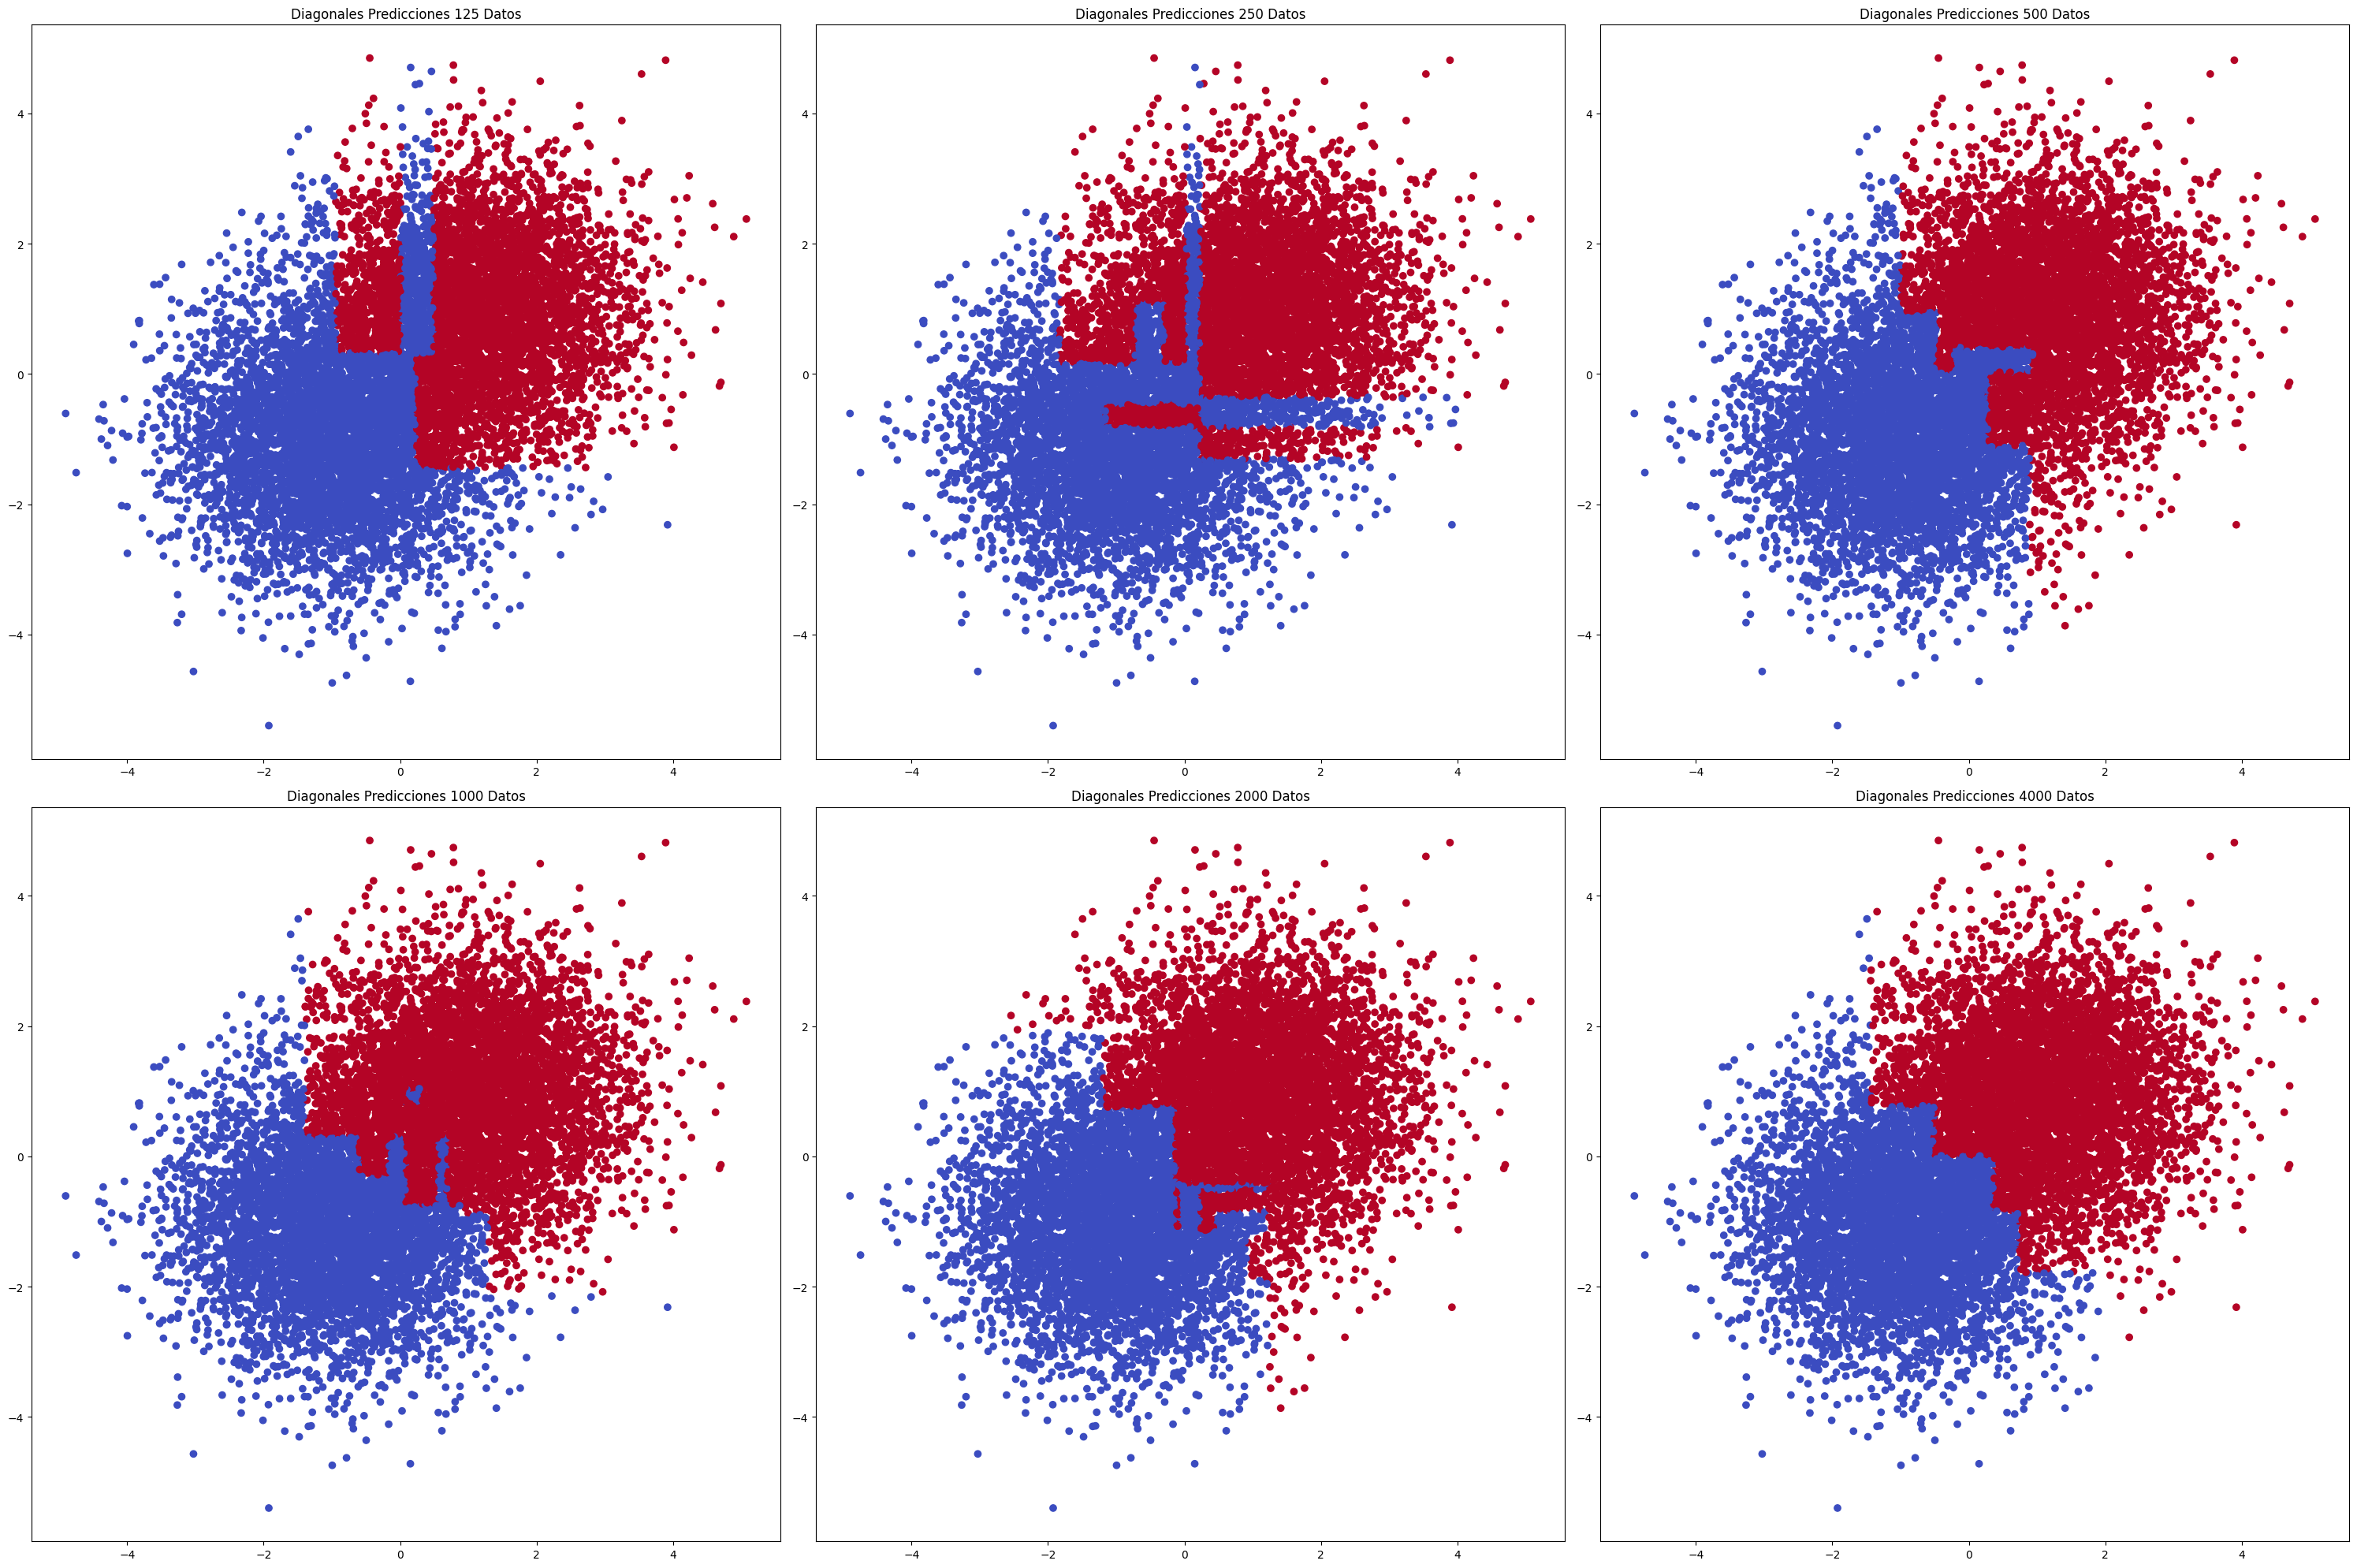

In [6]:
testDiagonales10000 = diagonales(10000, 2, 0.78)
X_test = testDiagonales10000.drop(columns=['class'])
y_test = testDiagonales10000['class']

fig, axs = plt.subplots(2, 3, figsize=(30, 20))
for idx, samples in enumerate(sizes):
    for conjunto in range(0, 20):
        dfDiagonales = diagonales(samples, 2, 0.78)
        X = dfDiagonales.drop(columns=['class'])
        y = dfDiagonales['class']
        clf = DecisionTreeClassifier(criterion="entropy", min_impurity_decrease=0.002, random_state=0, min_samples_leaf=5)
        clf = clf.fit(X, y)
        errEntrenamiento = 1 - clf.score(X, y)
        errTest = 1 - clf.score(X_test, y_test)
        treeSize = clf.tree_.node_count
        dataDiagonales.append([samples, conjunto, errEntrenamiento, errTest, treeSize])
        if conjunto == 0:
            ax = axs[idx // 3, idx % 3]
            ax.scatter(X_test['dim_0'], X_test['dim_1'], c=clf.predict(X_test), cmap='coolwarm')
            ax.set_title(f'Diagonales Predicciones {samples} Datos')

plt.tight_layout()
plt.show()

### Paralelas

In [7]:
def paralelas(n, d, C):
  half = int(n/2)

  mClass0 = np.zeros(d)
  mClass0[0] = 1
  mClass1 = np.zeros(d)
  mClass1[0] = -1
  covM = np.identity(d) * (C**2)

  class0 = np.random.multivariate_normal(mClass0, covM, half)
  class1 = np.random.multivariate_normal(mClass1, covM, n - half)

  labels0 = np.zeros((half, 1))
  labels1 = np.ones((n - half, 1))

  data0 = np.hstack((class0, labels0))
  data1 = np.hstack((class1, labels1))

  data = np.vstack((data0, data1))

  columns = [f'dim_{i}' for i in range(d)] + ['class']
  dataFrame = pd.DataFrame(data, columns=columns)

  return dataFrame

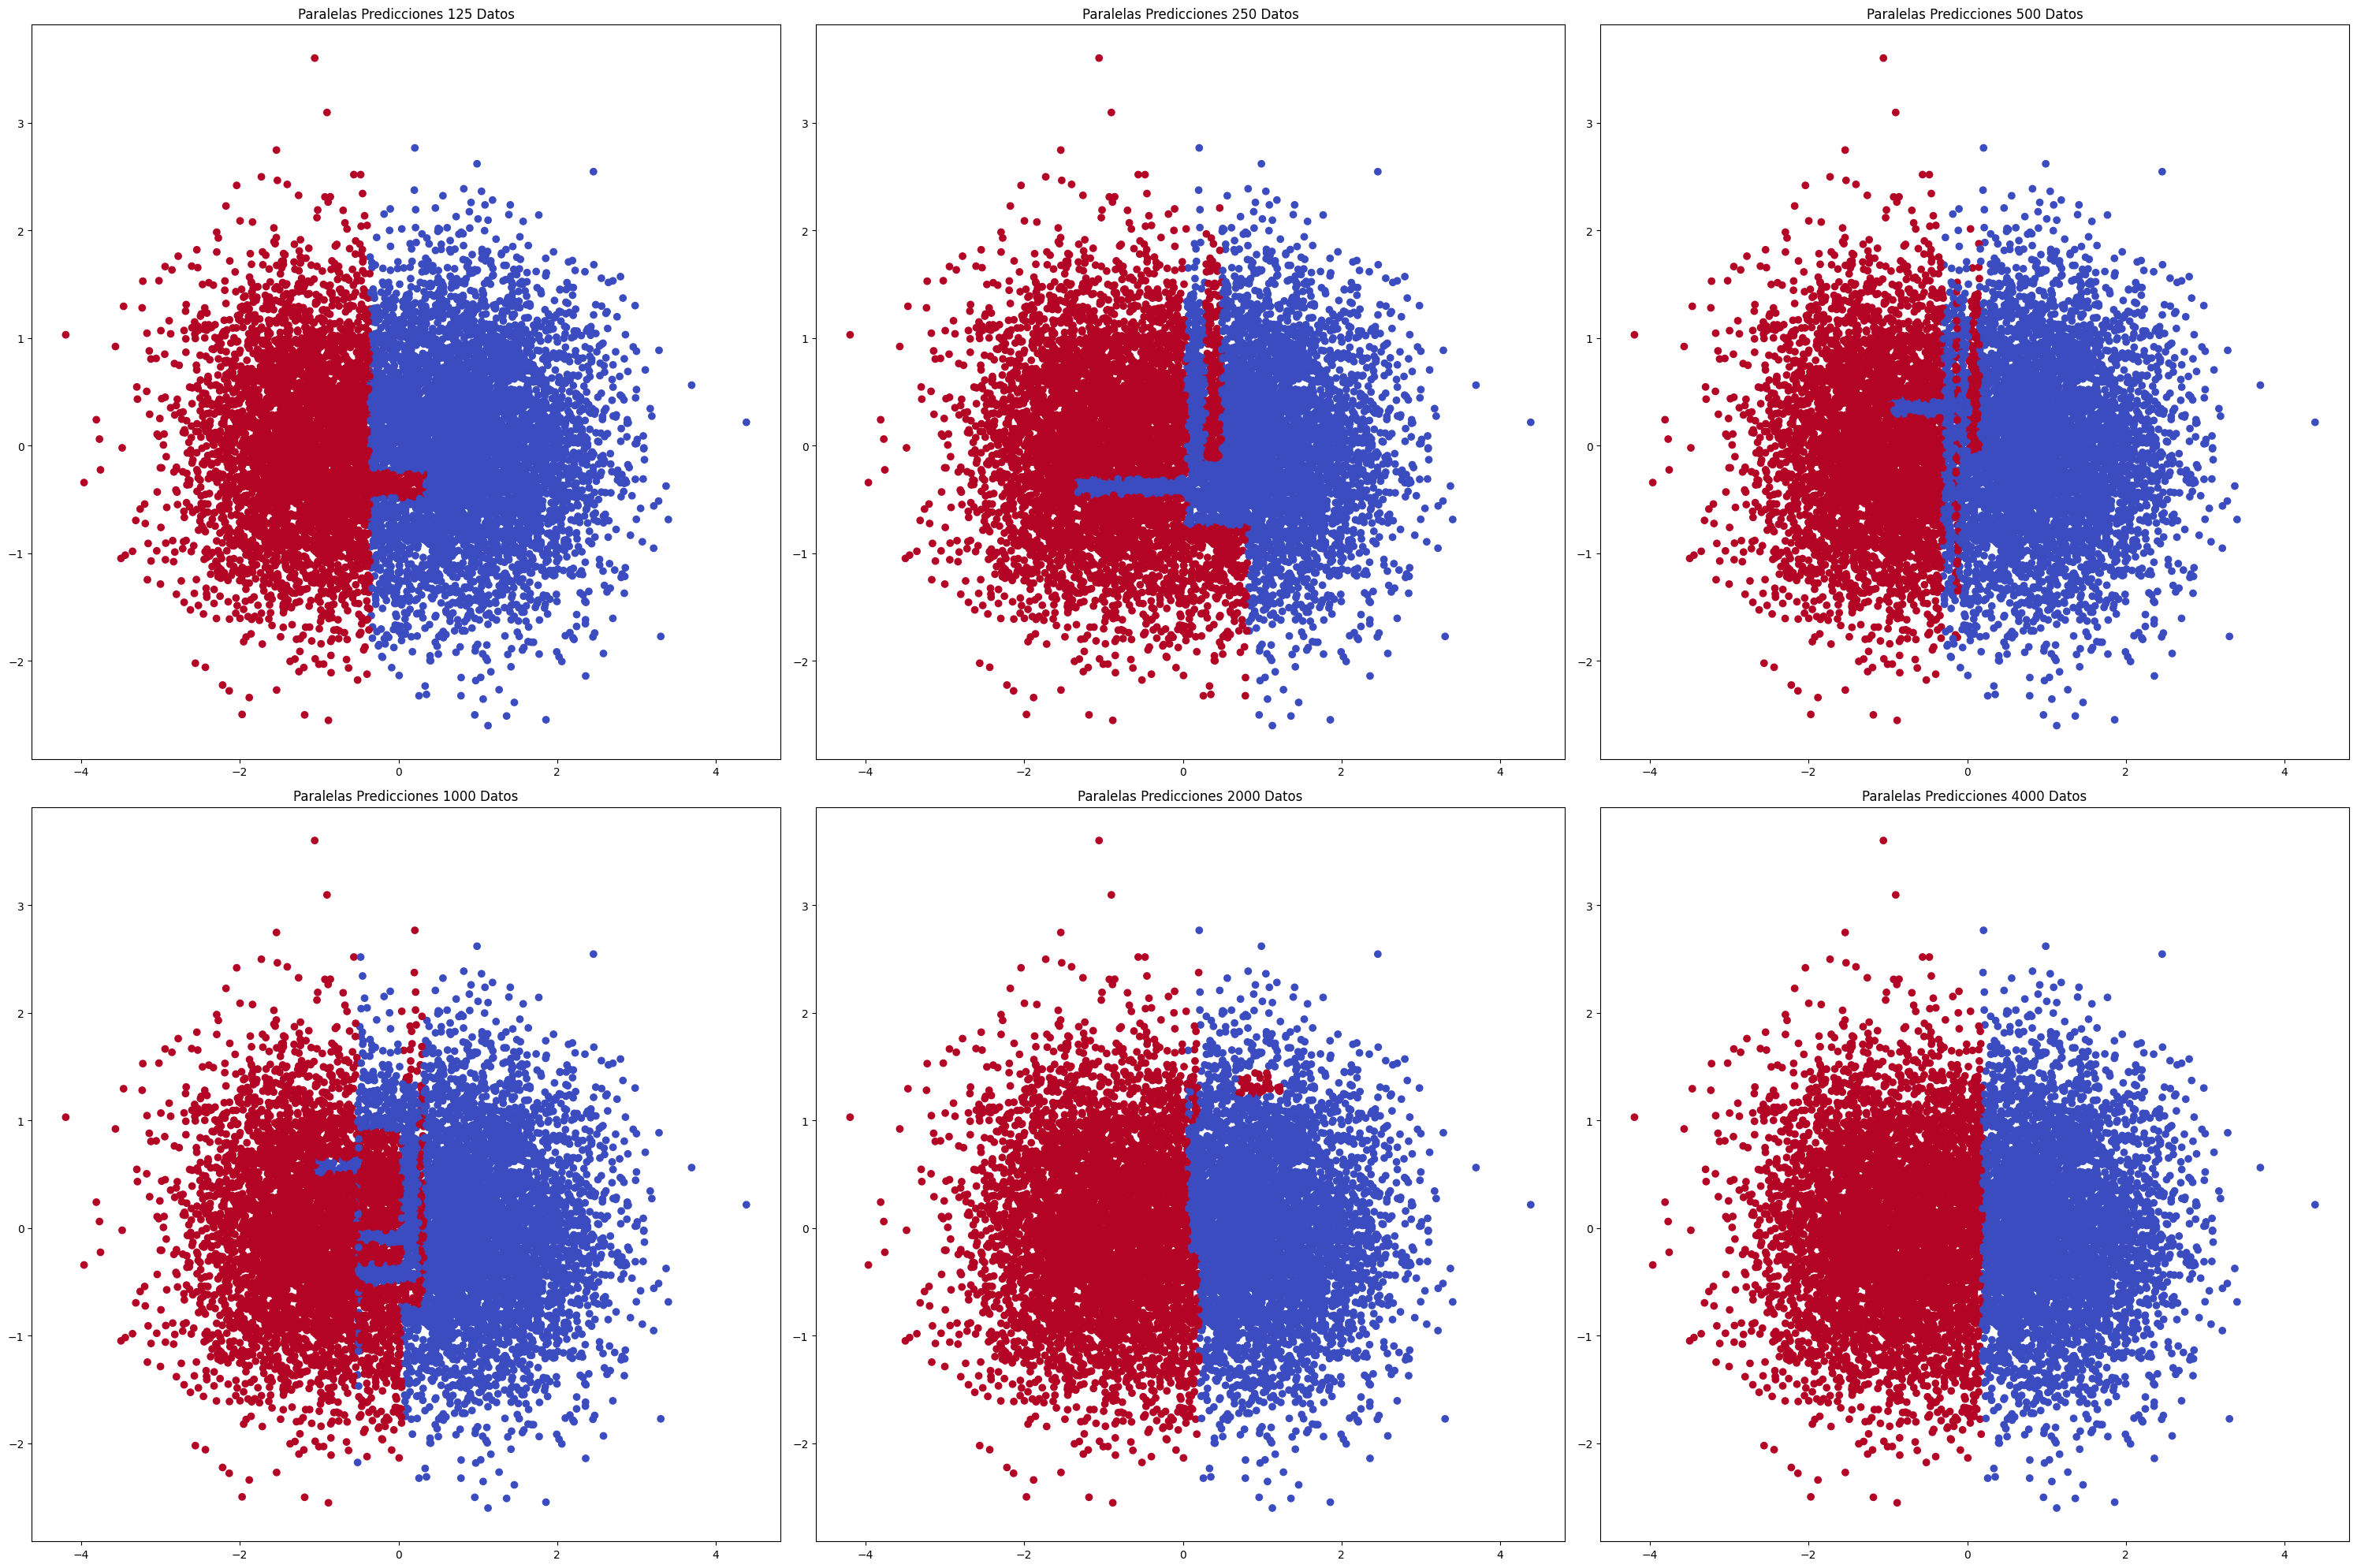

In [8]:
testParalelas10000 = paralelas(10000, 2, 0.78)
X_test = testParalelas10000.drop(columns=['class'])
y_test = testParalelas10000['class']

fig, axs = plt.subplots(2, 3, figsize=(30, 20))
for idx, samples in enumerate(sizes):
    for conjunto in range(0, 20):
        dfParalelas = paralelas(samples, 2, 0.78)
        X = dfParalelas.drop(columns=['class'])
        y = dfParalelas['class']
        clf = DecisionTreeClassifier(criterion="entropy", min_impurity_decrease=0.002, random_state=0, min_samples_leaf=5)
        clf = clf.fit(X, y)
        errEntrenamiento = 1 - clf.score(X, y)
        errTest = 1 - clf.score(X_test, y_test)
        treeSize = clf.tree_.node_count
        dataParalelas.append([samples, conjunto, errEntrenamiento, errTest, treeSize])
        if conjunto == 0:
            ax = axs[idx // 3, idx % 3]
            ax.scatter(X_test['dim_0'], X_test['dim_1'], c=clf.predict(X_test), cmap='coolwarm')
            ax.set_title(f'Paralelas Predicciones {samples} Datos')

plt.tight_layout()
plt.show()

### Errores

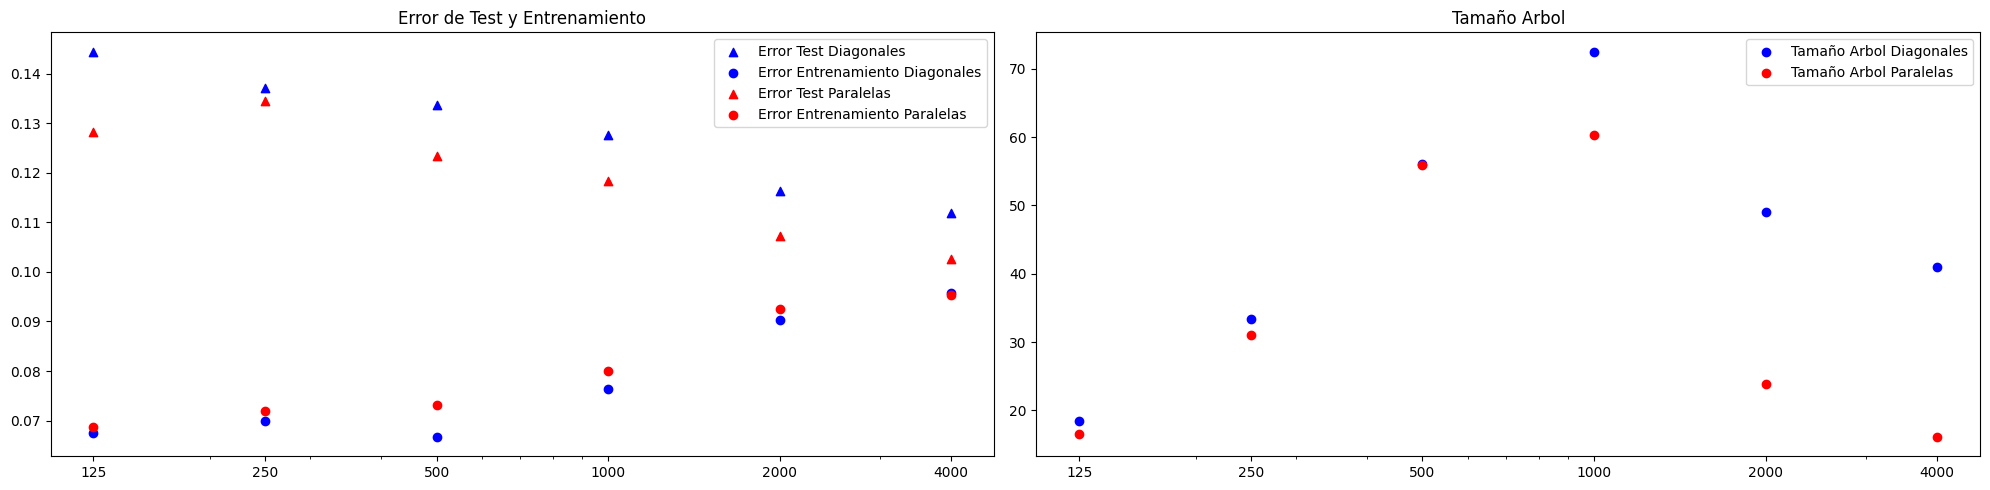

In [9]:
dfDiagonales = pd.DataFrame(dataDiagonales, columns=['samples', 'conjunto', 'errEntrenamiento', 'errTest', 'treeSize'])
dfParalelas = pd.DataFrame(dataParalelas, columns=['samples', 'conjunto', 'errEntrenamiento', 'errTest', 'treeSize'])
promsErrTestDiagonales = dfDiagonales.groupby('samples')['errTest'].mean()
promsErrEntrenamientoDiagonal = dfDiagonales.groupby('samples')['errEntrenamiento'].mean()
promsErrTestParalelas = dfParalelas.groupby('samples')['errTest'].mean()
promsErrEntrenamientoParalelas = dfParalelas.groupby('samples')['errEntrenamiento'].mean()
treeSizeDiagonal = dfDiagonales.groupby('samples')['treeSize'].mean()
treeSizeParalelas = dfParalelas.groupby('samples')['treeSize'].mean()

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].scatter(sizes, promsErrTestDiagonales, c='blue', label='Error Test Diagonales', marker='^')
axs[0].scatter(sizes, promsErrEntrenamientoDiagonal, c='blue', label='Error Entrenamiento Diagonales', marker='o')
axs[0].scatter(sizes, promsErrTestParalelas, c='red', label='Error Test Paralelas', marker='^')
axs[0].scatter(sizes, promsErrEntrenamientoParalelas, c='red', label='Error Entrenamiento Paralelas', marker='o')
axs[0].legend()
axs[0].set_xscale('log')
axs[0].set_title('Error de Test y Entrenamiento')
axs[0].set_xticks(sizes, labels=[str(size) for size in sizes])

axs[1].scatter(sizes, treeSizeDiagonal, c='blue', label='Tamaño Arbol Diagonales')
axs[1].scatter(sizes, treeSizeParalelas, c='red', label='Tamaño Arbol Paralelas')
axs[1].legend()
axs[1].set_xscale('log')
axs[1].set_title('Tamaño Arbol')
axs[1].set_xticks(sizes, labels=[str(size) for size in sizes])

plt.tight_layout()
plt.show()

Podemos observar en los gráficos de predicciones para ambos casos, diagonales y paralelas, que a medida que aumentan las muestras de entrenamiento, las predicciones se asemejan más a la figura "ideal". A medida que se incrementan las muestras de entrenamiento hasta 1000, las formas de los sectores con objetos mal clasificados se vuelven más complejas y diversas. Al principio, estos sectores son grandes y homogéneos, pero a medida que se agregan más muestras, se fragmentan en múltiples formas más finas y pequeñas.<br>

Al superar las 1000 muestras de entrenamiento, observamos una normalización en esta situación. Con 2000 y 4000 muestras, el árbol de decisión parece encontrar una regla de clasificación más general y correcta, lo que resulta en una representación más precisa de la forma ideal. Esto se evidencia en el tamaño del árbol, que aumenta hasta los 1000 ejemplos y luego disminuye considerablemente. Además, en los gráficos, la separación entre las clases es más clara y hay menos sectores mal clasificados.<br>

El error de entrenamiento aumenta a medida que se utilizan más muestras de entrenamiento porque es más difícil ajustar el modelo a todas las variaciones presentes en los datos. Esto conduce a una regla de clasificación más general. Sin embargo, esta generalización hace que el error en el conjunto de prueba disminuya, ya que el modelo puede capturar mejor la estructura subyacente de los datos y hacer predicciones más precisas en muestras no vistas.<br>

## Ejercicio 3

In [10]:
overlapping = [0.5, 1, 1.5, 2, 2.5]
dataDiagonales = []
dataParalelas = []
dimension = 5
testSamples = 10000
mClass0Diagonales = -np.ones(dimension)
mClass1Diagonales = np.ones(dimension)
mClass0Paralelas = np.zeros(dimension)
mClass0Paralelas[0] = 1
mClass1Paralelas = np.zeros(dimension)
mClass1Paralelas[0] = -1
ErrIdealTestDiagonales = []
ErrIdealTestParalelas = []

In [11]:
def clasificadorIdeal(X, mClass0, mClass1):
    predictClass = []
    for sample in X:
        predictClass.append(0) if (np.linalg.norm(sample - mClass0) < np.linalg.norm(sample - mClass1)) else predictClass.append(1)
    return predictClass

### Diagonales

In [12]:
for overlap in overlapping:
    testDiagonales10000 = diagonales(testSamples, dimension, overlap)
    X_test = testDiagonales10000.drop(columns=['class'])
    y_test = testDiagonales10000['class']

    countOk = 0
    predictClass = clasificadorIdeal(X_test.values, mClass0Diagonales, mClass1Diagonales)
    for cls in range(0,testSamples):
        if predictClass[cls] == y_test[cls]:
            countOk += 1
    ErrIdealTestDiagonales.append(1 - countOk / testSamples)

    for conjunto in range(0,20):
        dfDiagonales = diagonales(250, dimension, overlap)
        X = dfDiagonales.drop(columns=['class'])
        y = dfDiagonales['class']
        clf = DecisionTreeClassifier(criterion="entropy", min_impurity_decrease=0.002, random_state=0, min_samples_leaf=5)
        clf = clf.fit(X, y)
        errTest = 1 - clf.score(X_test, y_test)
        treeSize = clf.tree_.node_count
        dataDiagonales.append([overlap, conjunto, errTest, treeSize])



### Paralelas

In [13]:
for overlap in overlapping:
    testParalelas10000 = paralelas(testSamples, dimension, overlap)
    X_test = testParalelas10000.drop(columns=['class'])
    y_test = testParalelas10000['class']

    countOk = 0
    predictClass = clasificadorIdeal(X_test.values, mClass0Paralelas, mClass1Paralelas)
    for cls in range(0,testSamples):
        if predictClass[cls] == y_test[cls]:
            countOk += 1
    ErrIdealTestParalelas.append(1 - countOk / testSamples)

    for conjunto in range(0,20):
        dfParalelas = paralelas(250, dimension, overlap)
        X = dfParalelas.drop(columns=['class'])
        y = dfParalelas['class']
        clf = DecisionTreeClassifier(criterion="entropy", min_impurity_decrease=0.002, random_state=0, min_samples_leaf=5)
        clf = clf.fit(X, y)
        errTest = 1 - clf.score(X_test, y_test)
        treeSize = clf.tree_.node_count
        dataParalelas.append([overlap, conjunto, errTest, treeSize])


### Errores

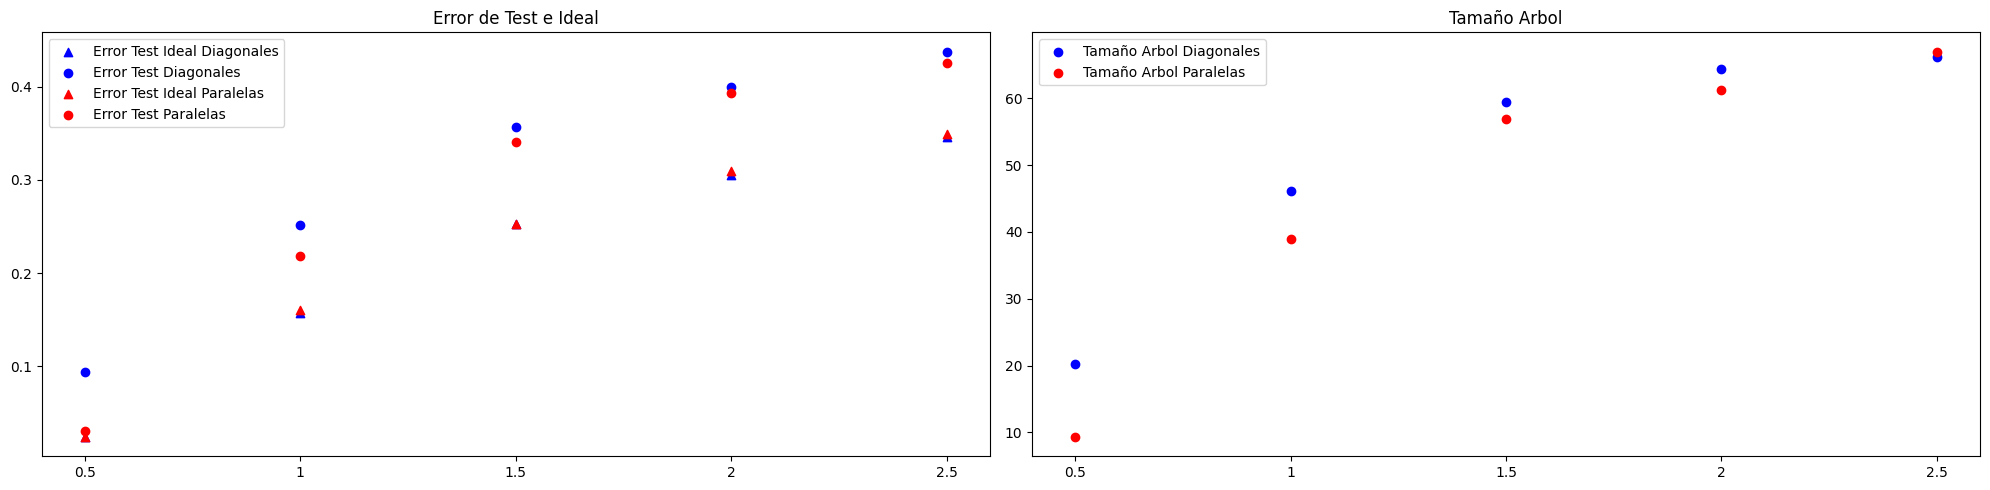

In [14]:
dfDiagonales = pd.DataFrame(dataDiagonales, columns=['overlap', 'conjunto', 'errTest', "treeSize"])
dfParalelas = pd.DataFrame(dataParalelas, columns=['overlap', 'conjunto', 'errTest', "treeSize"])
promsErrTestDiagonales = dfDiagonales.groupby('overlap')['errTest'].mean()
promsErrTestParalelas = dfParalelas.groupby('overlap')['errTest'].mean()

treeSizeDiagonal = dfDiagonales.groupby('overlap')['treeSize'].mean()
treeSizeParalelas = dfParalelas.groupby('overlap')['treeSize'].mean()

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].scatter(overlapping, ErrIdealTestDiagonales, c='blue', label='Error Test Ideal Diagonales', marker='^')
axs[0].scatter(overlapping, promsErrTestDiagonales, c='blue', label='Error Test Diagonales', marker='o')
axs[0].scatter(overlapping, ErrIdealTestParalelas, c='red', label='Error Test Ideal Paralelas', marker='^')
axs[0].scatter(overlapping, promsErrTestParalelas, c='red', label='Error Test Paralelas', marker='o')
axs[0].legend()
axs[0].set_title('Error de Test e Ideal')
axs[0].set_xticks(overlapping, labels=[str(overlap) for overlap in overlapping])

axs[1].scatter(overlapping, treeSizeDiagonal, c='blue', label='Tamaño Arbol Diagonales')
axs[1].scatter(overlapping, treeSizeParalelas, c='red', label='Tamaño Arbol Paralelas')
axs[1].legend()
axs[1].set_title('Tamaño Arbol')
axs[1].set_xticks(overlapping, labels=[str(overlap) for overlap in overlapping])

plt.tight_layout()
plt.show()

Para obtener los valores mínimos de error, definimos una función de "clasificador ideal" en la cual comparamos las distancias del punto a clasificar con cada centro y elegimos la más pequeña como la clase predicha. Posteriormente, contrastamos estos resultados con los verdaderos para calcular los errores.<br>

Es evidente que el error de los árboles siempre superará al ideal, y que a medida que aumenta el overlap, es decir, el ruido, el clasificador ideal incrementa su ratio de errores.<br>

Con un parámetro de overlap (C) = 0.5, podemos notar que en el problema de las paralelas, el error del árbol de decisión se aproxima mucho al de su clasificador ideal. También observamos que el tamaño del árbol es pequeño, lo que indica que encuentra una buena regla general para clasificar.<br>

Además, notamos que a medida que aumenta el parámetro C (overlap), es decir, la dispersión de los datos, lo cual introduce mayor ruido al sistema, aumenta el overfitting, reflejado en el incremento de errores, lo que nos aleja del clasificador ideal y de una regla más general y universal. Esto también se evidencia en el aumento en la cantidad de nodos en los árboles de decisión. Podemos observar cómo conforme aumenta el ruido y más se acerca el error de las paralelas al error de las diagonales, también lo hace en la cantidad de nodos del árbol.<br>

## Ejercicio 4

In [15]:
dimensiones = [2, 4, 8, 16, 32]
dataDiagonales = []
dataParalelas = []
overlap = 0.78
testSamples = 10000

### Diagonales

In [16]:
for dimension in dimensiones:
    testDiagonales10000 = diagonales(testSamples, dimension, overlap)
    X_test = testDiagonales10000.drop(columns=['class'])
    y_test = testDiagonales10000['class']

    for conjunto in range(0,20):
        dfDiagonales = diagonales(250, dimension, overlap)
        X = dfDiagonales.drop(columns=['class'])
        y = dfDiagonales['class']
        clf = DecisionTreeClassifier(criterion="entropy", min_impurity_decrease=0.002, random_state=0, min_samples_leaf=5)
        clf = clf.fit(X, y)
        errTest = 1 - clf.score(X_test, y_test)
        errEntrenamiento = 1 - clf.score(X, y)
        treeSize = clf.tree_.node_count
        dataDiagonales.append([dimension, conjunto, errTest, errEntrenamiento, treeSize])

### Paralelas

In [17]:
for dimension in dimensiones:
    testParalelas10000 = paralelas(testSamples, dimension, overlap)
    X_test = testParalelas10000.drop(columns=['class'])
    y_test = testParalelas10000['class']

    for conjunto in range(0,20):
        dfParalelas = paralelas(250, dimension, overlap)
        X = dfParalelas.drop(columns=['class'])
        y = dfParalelas['class']
        clf = DecisionTreeClassifier(criterion="entropy", min_impurity_decrease=0.002, random_state=0, min_samples_leaf=5)
        clf = clf.fit(X, y)
        errTest = 1 - clf.score(X_test, y_test)
        errEntrenamiento = 1 - clf.score(X, y)
        treeSize = clf.tree_.node_count
        dataParalelas.append([dimension, conjunto, errTest, errEntrenamiento, treeSize])

### Errores

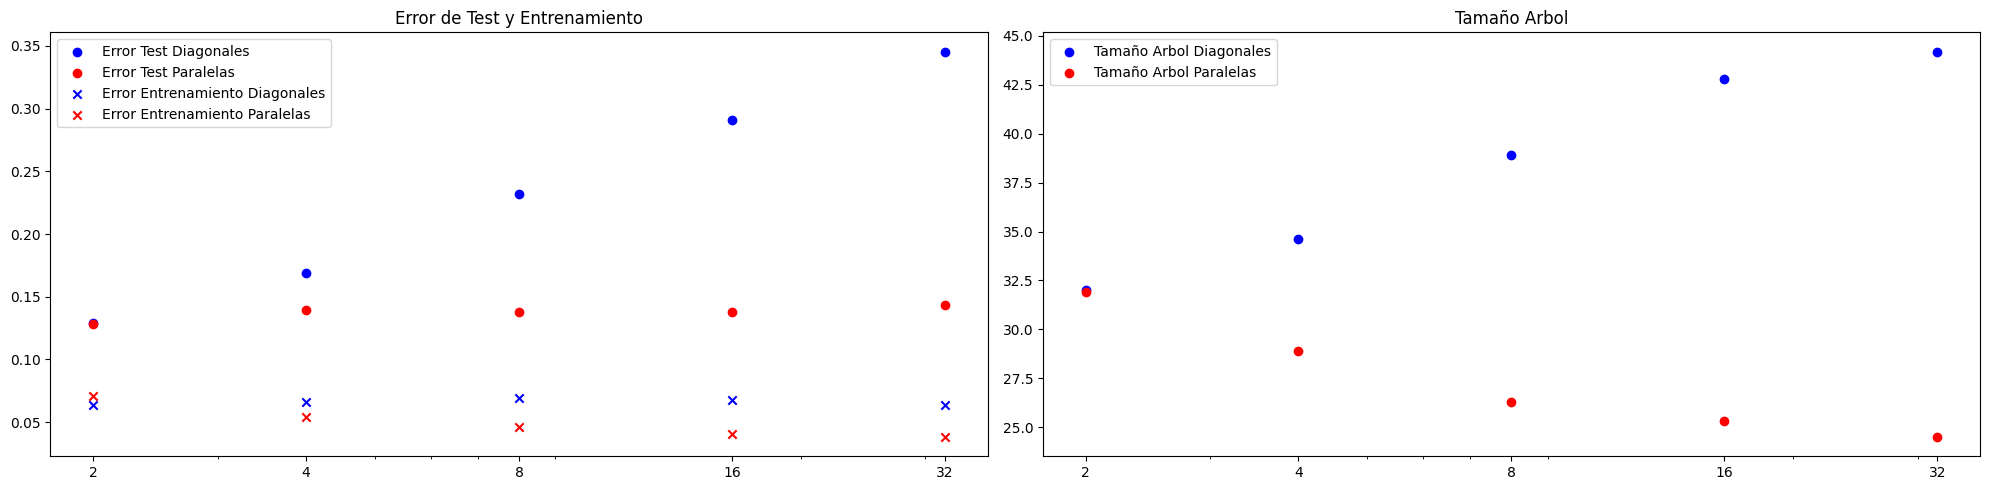

In [18]:
dfDiagonales = pd.DataFrame(dataDiagonales, columns=['dimension', 'conjunto', 'errTest', 'errEntrenamiento', 'treeSize'])
dfParalelas = pd.DataFrame(dataParalelas, columns=['dimension', 'conjunto', 'errTest', 'errEntrenamiento', 'treeSize'])
promsErrTestDiagonales = dfDiagonales.groupby('dimension')['errTest'].mean()
promsErrTestParalelas = dfParalelas.groupby('dimension')['errTest'].mean()
promsErrEntrenamientoDiagonales = dfDiagonales.groupby('dimension')['errEntrenamiento'].mean()
promsErrEntrenamientoParalelas = dfParalelas.groupby('dimension')['errEntrenamiento'].mean()

treeSizeDiagonal = dfDiagonales.groupby('dimension')['treeSize'].mean()
treeSizeParalelas = dfParalelas.groupby('dimension')['treeSize'].mean()

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].scatter(dimensiones, promsErrTestDiagonales, c='blue', label='Error Test Diagonales', marker='o')
axs[0].scatter(dimensiones, promsErrTestParalelas, c='red', label='Error Test Paralelas', marker='o')
axs[0].scatter(dimensiones, promsErrEntrenamientoDiagonales, c='blue', label='Error Entrenamiento Diagonales', marker='x')
axs[0].scatter(dimensiones, promsErrEntrenamientoParalelas, c='red', label='Error Entrenamiento Paralelas', marker='x')
axs[0].legend()
axs[0].set_xscale('log')
axs[0].set_title('Error de Test y Entrenamiento')
axs[0].set_xticks(dimensiones, labels=[str(dimension) for dimension in dimensiones])

axs[1].scatter(dimensiones, treeSizeDiagonal, c='blue', label='Tamaño Arbol Diagonales')
axs[1].scatter(dimensiones, treeSizeParalelas, c='red', label='Tamaño Arbol Paralelas')
axs[1].legend()
axs[1].set_xscale('log')
axs[1].set_title('Tamaño Arbol')
axs[1].set_xticks(dimensiones, labels=[str(dimension) for dimension in dimensiones])

plt.tight_layout()
plt.show()

En el problema de las paralelas, notamos que el error promedio permanece relativamente constante a medida que aumenta la dimensionalidad. Esto sugiere que el problema exhibe una estructura más simple y lineal, donde la adición de más dimensiones no altera significativamente la capacidad del modelo para realizar predicciones precisas.

Por otro lado, en el caso de las diagonales, observamos un aumento en el error y la cantidad de nodos, a medida que aumenta la dimensionalidad. Esto indica que el problema se vuelve más complejo a mas dimensiones, ya que la identificación de los atributos más relevantes para la toma de decisiones se vuelve más desafiante para el árbol.

Esto nos dice que el problema de las paralelas es menos sensible al cambio en la dimensionalidad, a diferencia de las diagonales.

## Ejercicio 5

C:\Users\Poma\AppData\Local\Temp\ipykernel_15056\970335314.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()


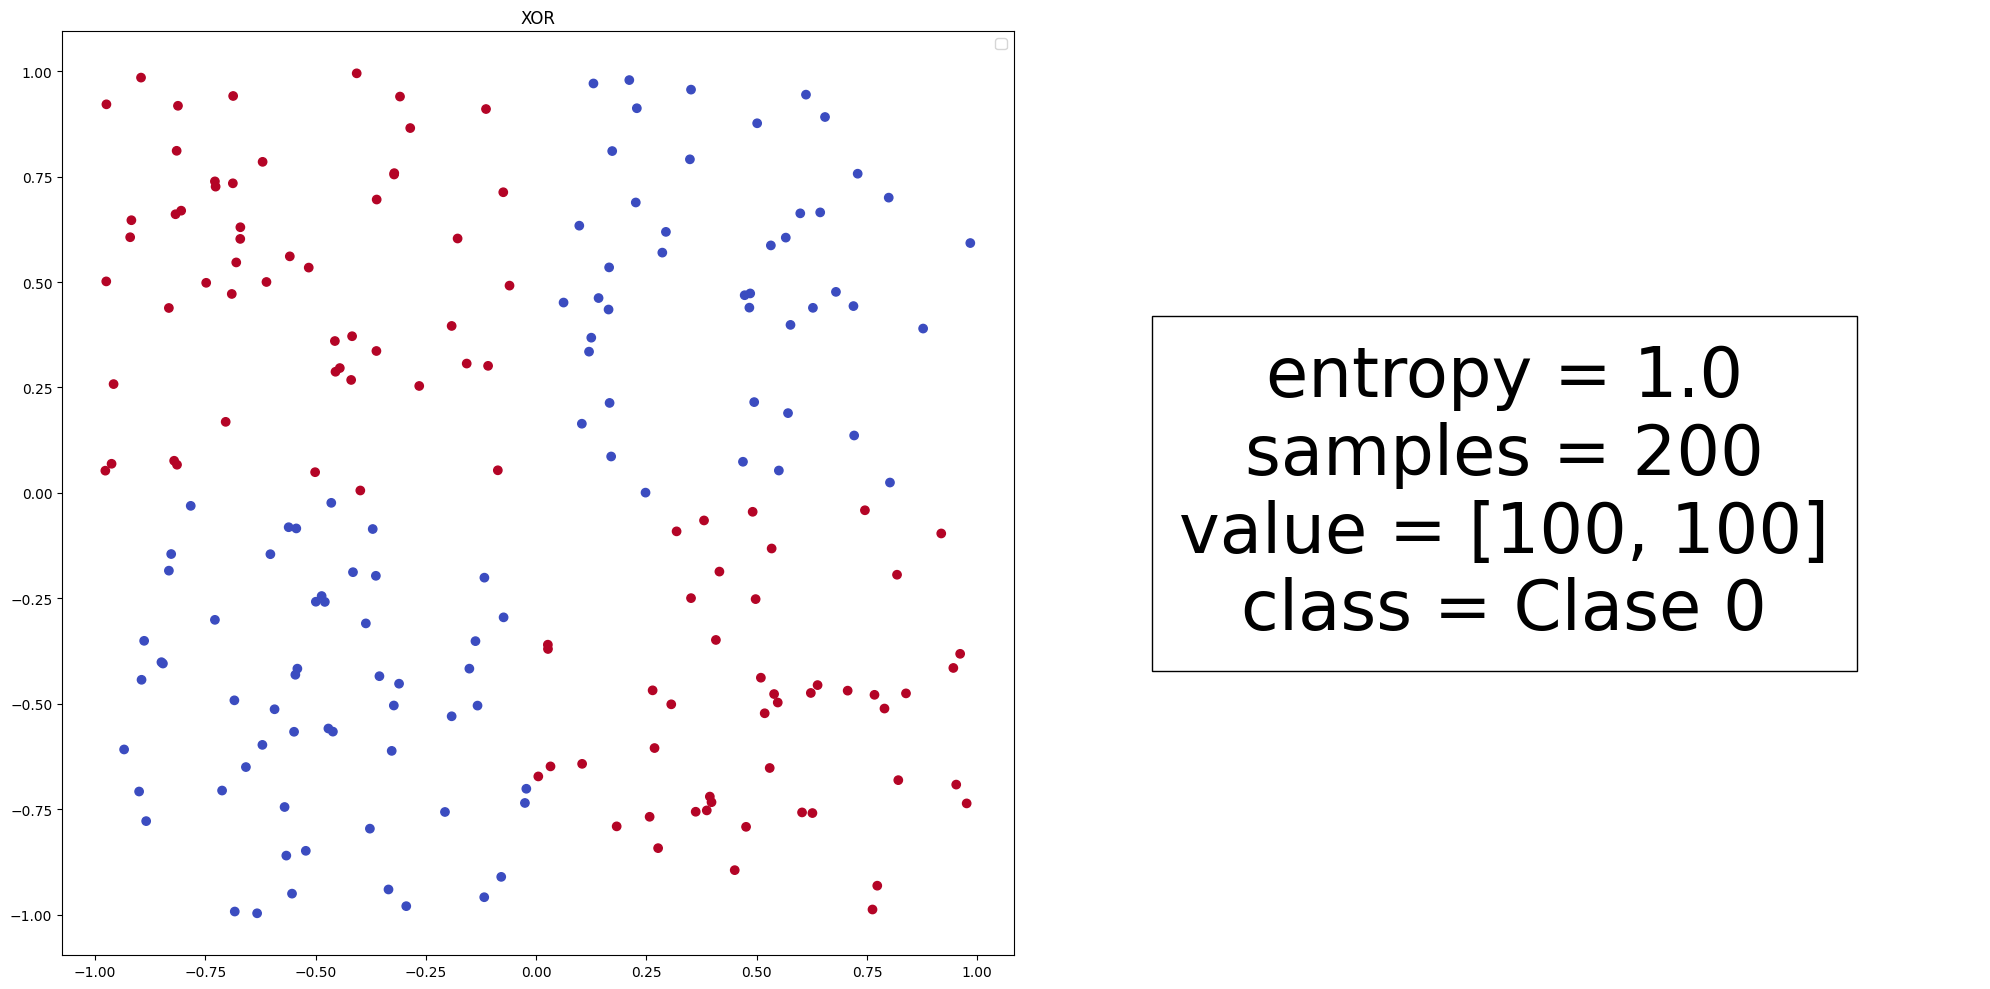

In [22]:
csv = pd.read_csv('xor.csv', names=['dim_0', 'dim_1', 'class'])
X = csv.drop(columns=['class'])
y = csv['class']

clf = DecisionTreeClassifier(criterion="entropy", min_impurity_decrease=0.03, random_state=0, min_samples_leaf=5)
clf.fit(X, y)

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].scatter(X['dim_0'], X['dim_1'], c=y, cmap='coolwarm')
axs[0].legend()
axs[0].set_title('XOR')

tree.plot_tree(clf, filled=True, feature_names=['dim_0', 'dim_1'], class_names=['Clase 0', 'Clase 1'], ax=axs[1])

plt.tight_layout()
plt.show()



El árbol más simple que clasifica correctamente todos los puntos en el problema XOR se puede definir de la siguiente manera:

- Si dim_0 <= 0:
  - Si dim_1 <= 0: Clase 0
  - Si dim_1 > 0: Clase 1
- Si dim_0 > 0:
  - Si dim_1 <= 0: Clase 1
  - Si dim_1 > 0: Clase 0

Se obtiene un árbol con un único nodo, estimo que min_impurity_decrease=0.03 es lo que causa esto, ya que solo se realizan divisiones si resultan en una reducción de la impureza de ese grado. Como ninguna división logra esa reducción de impureza, el proceso termina al crearse un solo nodo.